https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python
https://www.kaggle.com/sgus1318/titanic-analysis-learning-to-swim-with-python

In [1]:
import os
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.offline as offline
import cufflinks as cf

import math

pd.options.display.max_columns = None

In [2]:
clean_heloc = pd.read_excel('heloc_clean_dataset.xlsx')
display(clean_heloc.head(n=5))

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,3,5,23,1,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,0,8,7,0,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,7,8,9,4,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,6,6,30,3,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,7,8,12,0,25,0,1,1,51,89,3,1,0,80


In [3]:
riskperf_raw = clean_heloc['RiskPerformance']
features = clean_heloc.drop('RiskPerformance' , axis = 1)
dic={'Good':0, 'Bad':1}
riskperf = riskperf_raw.map(dic)
print(riskperf.head())

0    1
1    1
2    1
3    1
4    1
Name: RiskPerformance, dtype: int64


In [1]:
# performance metric
from sklearn.metrics import recall_score, precision_score, make_scorer
from sklearn.metrics import confusion_matrix

def g_mean(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1: # Correct identification of Bad RiskPerformance
           TN += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]: # Incorrect classified Good RiskPerformance as Bad
           FN += 1
        if y_actual[i]==y_pred[i]==0: # Correct identification of Good RiskPerformance
           TP += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]: # Incorrect classified Good RiskPerformance as Bad
           FP += 1
    
    #print('Manual metrics: ', TN, FN,TP,FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)

    return sensi*speci

y_true = [0,0,0, 1, 1, 0,0,0,0, 1]
y_pred = [1,1,1, 1, 1, 0,0,0,0,0]
CM=confusion_matrix(y_true, y_pred)
print(CM)
TN1 = CM[0][0]
FN1 = CM[1][0]
TP1 = CM[1][1]
FP1 = CM[0][1]
print('CM metrics: ', TN1, FN1,TP1,FP1)
g = g_mean(y_true, y_pred)
print(g)


[[4 3]
 [1 2]]
CM metrics:  4 1 2 3
0.38095238095238093


In [5]:
from sklearn.linear_model import LogisticRegression
from  sklearn.model_selection import train_test_split
import lime.lime_tabular as tb

X_train, X_valid, y_train, y_valid = train_test_split(features, riskperf, test_size=0.2, random_state=7)
logi = LogisticRegression(C=1e10)
logi.fit(X_train, y_train)
print(logi.coef_)
print(type(X_train))
#explainer = tb.LimeTabularExplainer(X_train, feature_names=list(features), class_names=[0,1], discretize_continuous=True)





[[ -6.48780944e-02  -3.70141851e-04   2.99491928e-03  -8.64490885e-03
   -2.75355877e-02  -2.25831811e-02  -2.86012901e-02  -1.43675291e-02
   -2.43562197e-03  -5.84039102e-02  -2.48893761e-02   1.51415486e-03
    1.56574441e-02   9.15697204e-03  -3.02746430e-02   3.84188921e-01
   -3.04751849e-01   1.17863069e-02   4.78047781e-04   6.00467206e-02
   -2.66215127e-02  -4.63986030e-02  -1.99472698e-03]]
<class 'pandas.core.frame.DataFrame'>


In [15]:
import sklearn.datasets

iris = sklearn.datasets.load_iris()
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(iris.data, iris.target, train_size=0.80)
print(type(train))



<class 'numpy.ndarray'>


C:\Users\Rishiraj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



In [10]:



# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
shap_values = shap.TreeExplainer(model).shap_values(features)



Exception: Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model.logistic.LogisticRegression'>

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
for i in range(1,10):
    print("Number of features: ",i)
    rfe = RFE(model, i)
    rfe = rfe.fit(features, riskperf)
    # summarize the selection of the attributes
    print('Selected features: %s' % list(features.columns[rfe.support_]))
    print('Score: %f' % rfe.score(features, riskperf))
    print('G-mean: %f' % g_mean(riskperf, rfe.predict(features)))

Number of features:  1
Selected features: ['NumInqLast6M']
Score: 0.562595
G-mean: 0.301913
Number of features:  2
Selected features: ['NumInqLast6M', 'NumInqLast6Mexcl7days']
Score: 0.562595
G-mean: 0.301913
Number of features:  3
Selected features: ['ExternalRiskEstimate', 'NumInqLast6M', 'NumInqLast6Mexcl7days']
Score: 0.708566
G-mean: 0.499544
Number of features:  4
Selected features: ['ExternalRiskEstimate', 'NumTrades90Ever2DerogPubRec', 'NumInqLast6M', 'NumInqLast6Mexcl7days']
Score: 0.709174
G-mean: 0.499430
Number of features:  5
Selected features: ['ExternalRiskEstimate', 'NumSatisfactoryTrades', 'NumTrades90Ever2DerogPubRec', 'NumInqLast6M', 'NumInqLast6Mexcl7days']
Score: 0.720730
G-mean: 0.517892
Number of features:  6
Selected features: ['ExternalRiskEstimate', 'NumSatisfactoryTrades', 'NumTrades90Ever2DerogPubRec', 'NumInqLast6M', 'NumInqLast6Mexcl7days', 'NumRevolvingTradesWBalance']
Score: 0.720933
G-mean: 0.518104
Number of features:  7
Selected features: ['ExternalRi

Selected features: ['ExternalRiskEstimate', 'NumSatisfactoryTrades', 'NumTrades90Ever2DerogPubRec', 'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days', 'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance']


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
scoring_fnc= make_scorer(g_mean)
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring=scoring_fnc)
rfecv.fit(features, riskperf)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(features.columns[rfecv.support_]))
print("Num Features:",rfecv.n_features_)
print("Selected Features:",rfecv.support_)
print("Feature Ranking: ",rfecv.ranking_)
print("bla bla:", rfecv.grid_scores_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xticks(np.arange(0, 25, 1))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
print(rfecv.score(features, riskperf))

In [12]:
from sklearn.isotonic import check_increasing as mon
print(mon(features['ExternalRiskEstimate'], riskperf))

False


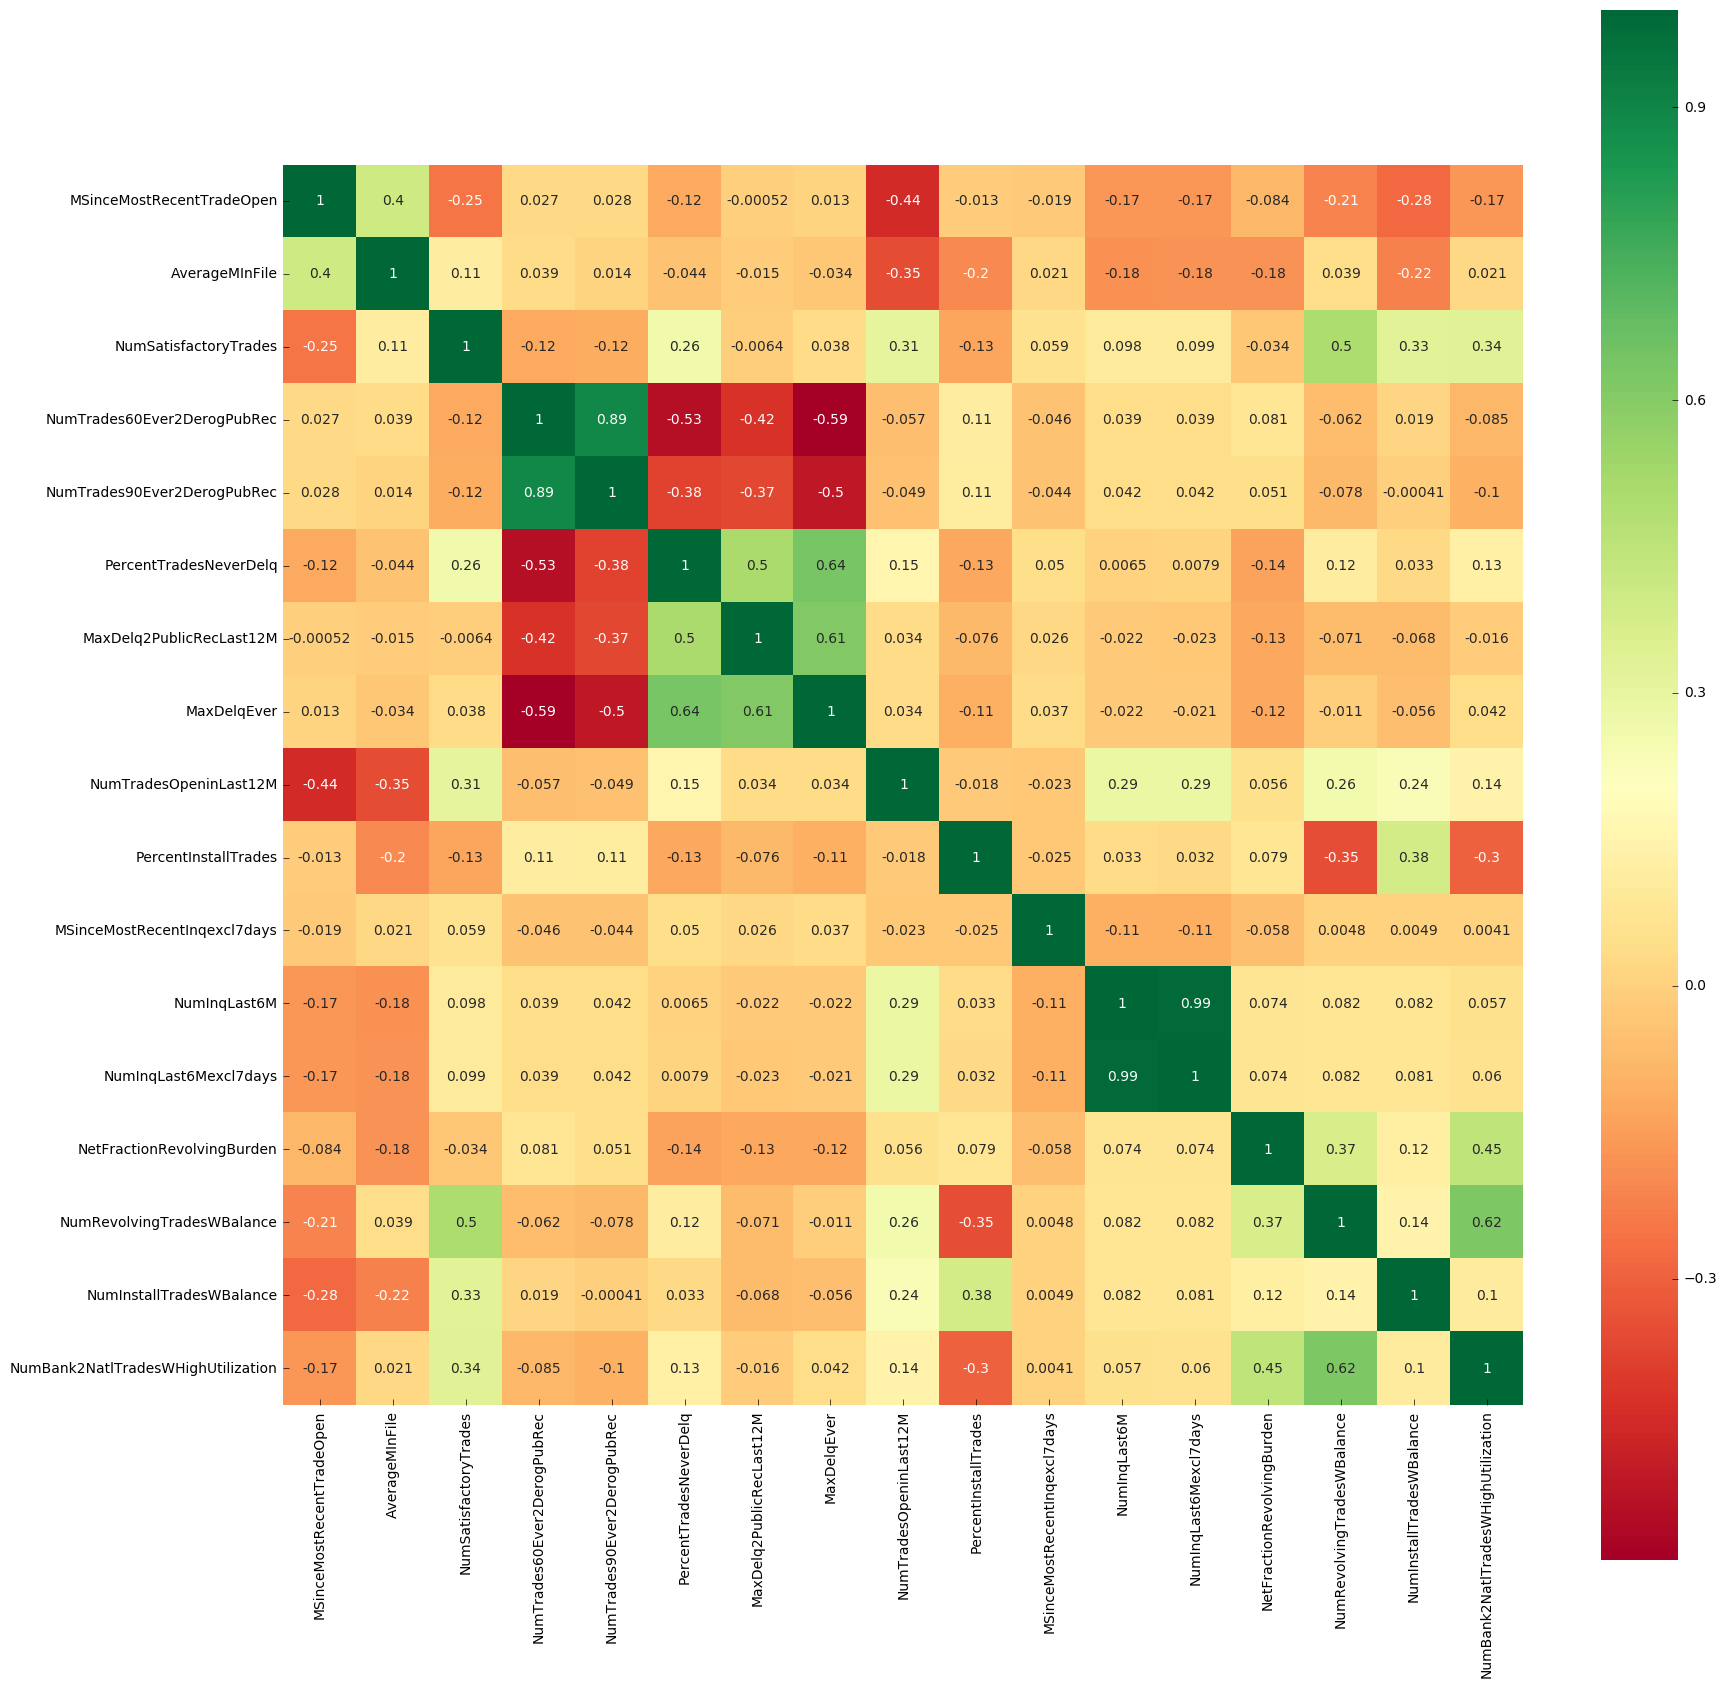

In [8]:
#Selected_features = ['ExternalRiskEstimate', 'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTradesOpeninLast12M', 'PercentInstallTrades', 'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days', 'NetFractionRevolvingBurden', 'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance', 'NumBank2NatlTradesWHighUtilization']
Selected_features = [ 'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTradesOpeninLast12M', 'PercentInstallTrades', 'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days', 'NetFractionRevolvingBurden', 'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance', 'NumBank2NatlTradesWHighUtilization']

X = features[Selected_features]

plt.subplots(figsize=(20,20))
sns.heatmap(X.corr(),annot= True, square=True, cmap="RdYlGn")
plt.show()

External Risk estimate is not interpretable and hence it should maybe be dropped
Strong collinearity between the following pairs (to be fixed via feature engineering):
    1. NumInqLast6M vs NumInqLast6MExcl7days (0.99)
    2. NumTrades60Ever2DerogPubRec and NumTrades90Ever2DerogPubRec (0.89)
    3. MaxDelqEver vs PercentTradesNeverDelq
    

Train/Test split results:
LogisticRegression precision is 0.728
LogisticRegression recall is 0.745
LogisticRegression auc is 0.790


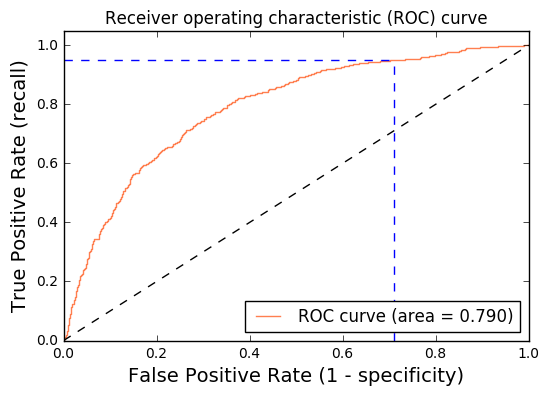

Using a threshold of 0.219 guarantees a sensitivity of 0.950 and a specificity of 0.291, i.e. a false positive rate of 70.95%.


In [8]:
#from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)


# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(features, riskperf,  test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" precision is %2.3f" % precision_score(y_test, y_pred))
print(logreg.__class__.__name__+" recall is %2.3f" % recall_score(y_test, y_pred))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [9]:
#https://www.kaggle.com/vincepota/predicting-customers-who-will-charge-off

def run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced'):
    
    clfs = {'GradientBoosting': GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3),
            'LogisticRegression' : LogisticRegression(),
            #'GaussianNB': GaussianNB(),
            'RandomForestClassifier': RandomForestClassifier(n_estimators=10)
            }
    cols = ['model','matthews_corrcoef', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)

        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve - {}'.format(model_type))
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    return models_report, conf_matrix

In [ ]:
# Transform skewed continuous features

# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data =features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))


           Classes  precision  recall  f1-score  support
class          0.0       0.50    0.50      0.50      2.0
class          1.0       0.67    0.67      0.67      3.0
avg/total      0.6       0.60    0.60      5.00      NaN
0.335


In [29]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)

    return sensi*speci

y_true = [0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 1]
g_mean = perf_measure(y_true, y_pred)
print(g_mean)

0.3333333333333333


https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/
http://www.juanshishido.com/logisticcoefficients.html
http://www.statisticssolutions.com/theres-nothing-odd-about-the-odds-ratio-interpreting-binary-logistic-regression/
http://kevinyuan.ca/2016/08/01/Interpreting-Logistic-Regression/
https://www.unm.edu/~schrader/biostat/bio2/Spr06/lec11.pdf